In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

In [17]:
sp=pd.read_csv('StudentsPerformance.csv')

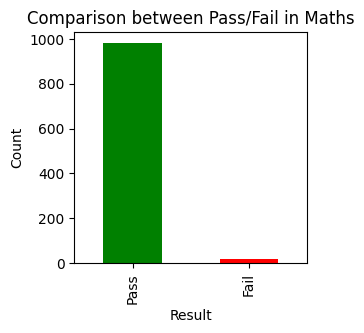

,count
pass_math,
Pass,981
Fail,19


In [18]:
passingmark=33
sp['pass_math'] = np.where(sp['math score']>= passingmark, 'Pass', 'Fail')
sp['pass_math'].value_counts(dropna = False).plot.bar(color=['green','red'], figsize = (3,3))

plt.title('Comparison between Pass/Fail in Maths')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
sp['pass_math'].value_counts()

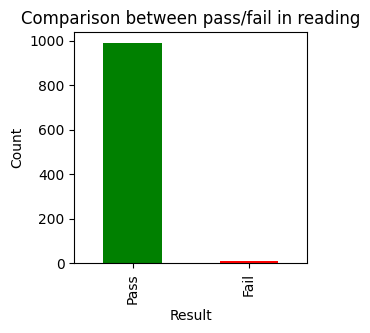

,count
pass_read,
Pass,989
Fail,11


In [19]:
sp['pass_read']=np.where(sp['reading score']>=passingmark, 'Pass','Fail')
sp['pass_read'].value_counts(dropna=False).plot.bar(color=['green','red'],figsize=(3,3))
plt.title('Comparison between pass/fail in reading')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
sp['pass_read'].value_counts()

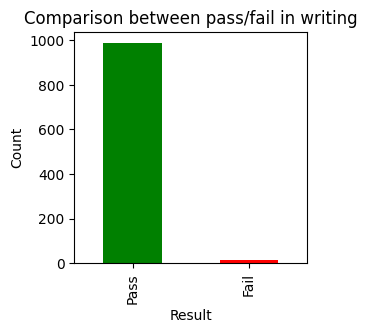

,count
pass_write,
Pass,988
Fail,12


In [25]:
sp['pass_write']=np.where(sp['writing score']>=passingmark,'Pass','Fail' )
sp['pass_write'].value_counts(dropna=False).plot.bar(color=['green','red'],figsize=(3,3))
plt.title('Comparison between pass/fail in writing')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
sp['pass_write'].value_counts()

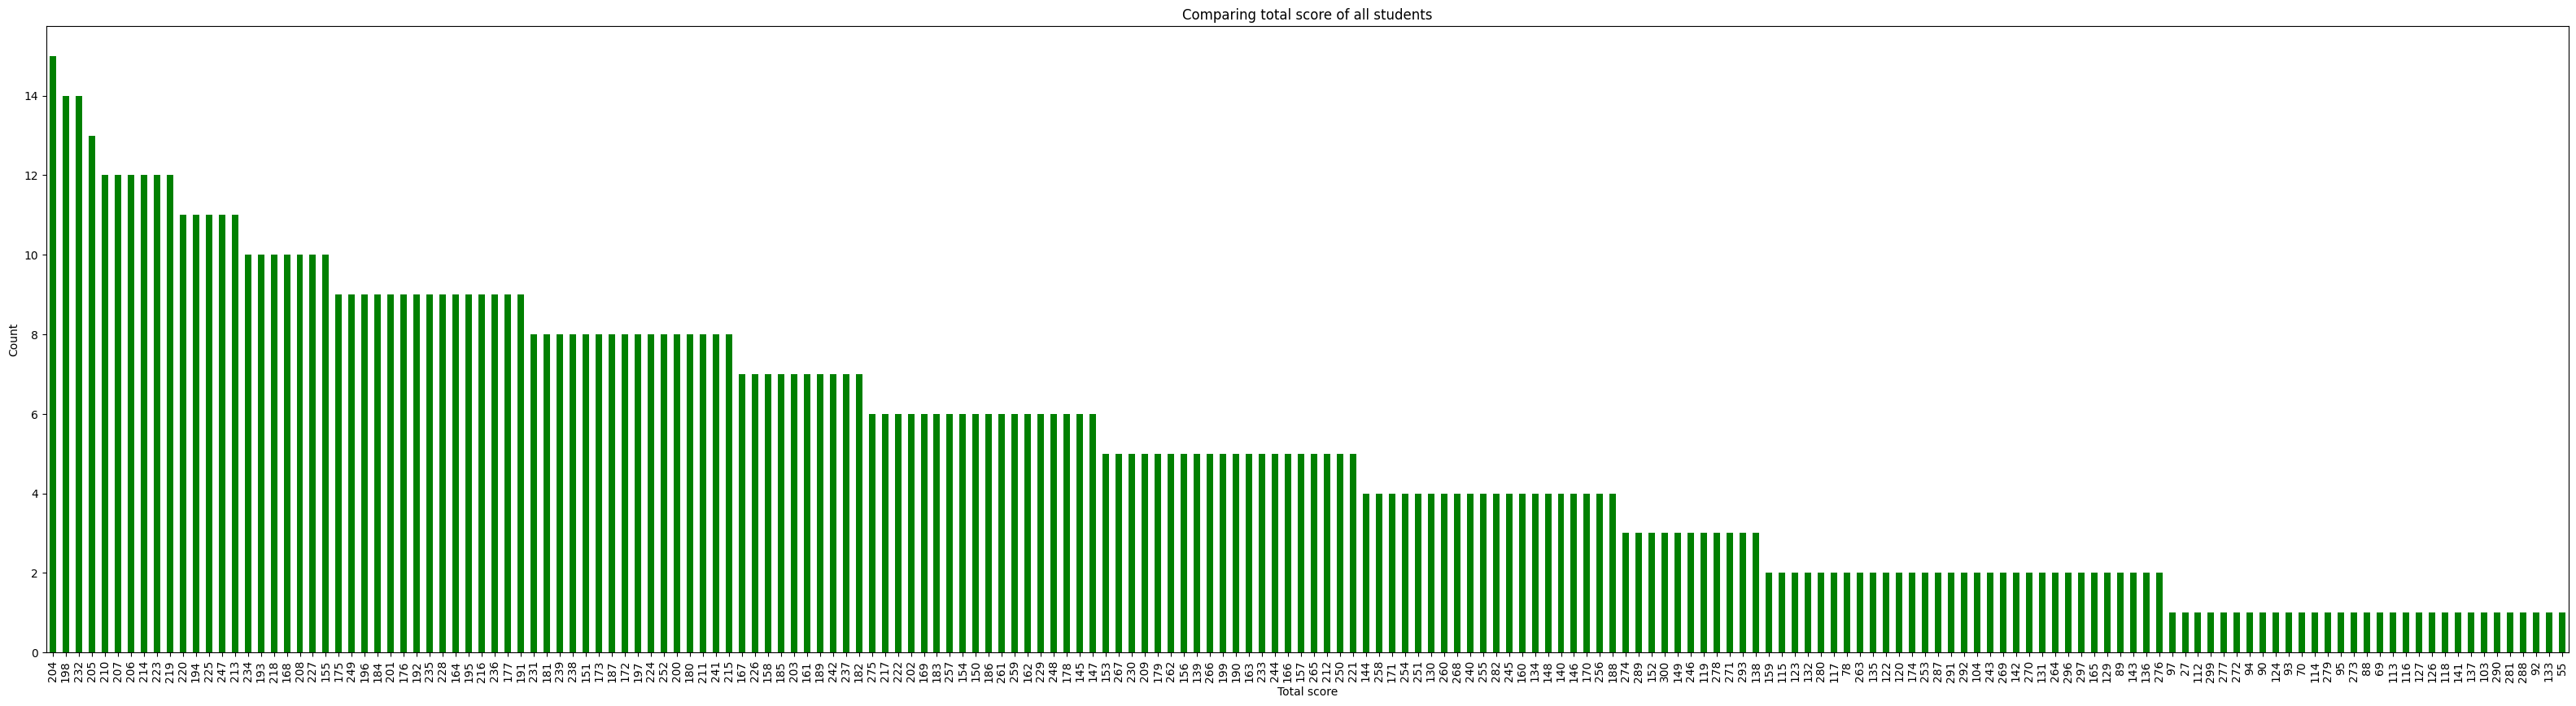

In [27]:
sp['total_score']=sp['math score']+sp['reading score']+sp['writing score']

sp['total_score'].value_counts(normalize=True)
sp['total_score'].value_counts(dropna=True).plot.bar(color='green',figsize=(40,10))

plt.title('Comparing total score of all students')
plt.xlabel('Total score')
plt.ylabel('Count')
plt.show()

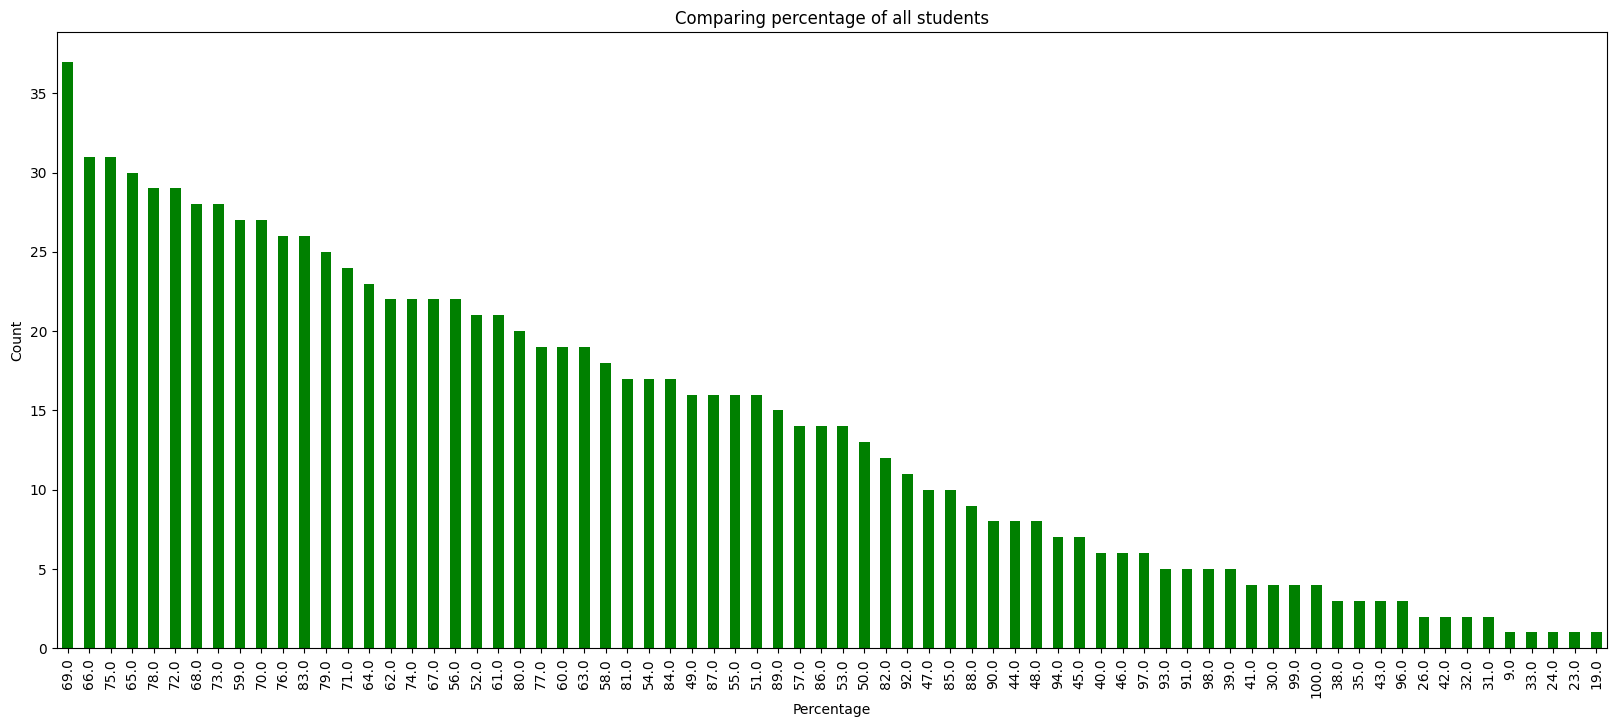

In [26]:
from math import ceil
import numpy as np

sp['percentage'] = sp['total_score']/3
sp['percentage'] = np.ceil(sp['percentage'])

sp['percentage'].value_counts(normalize=True)
sp['percentage'].value_counts(dropna=False).plot.bar(figsize=(20,8),color='green')

plt.title('Comparing percentage of all students')
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.show()

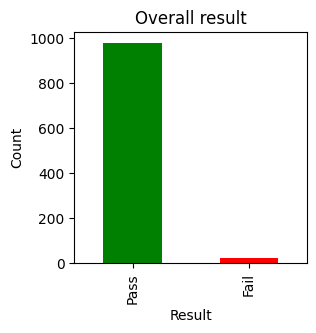

,count
result,
Pass,978
Fail,22


In [29]:
sp['result'] = sp.apply(
    lambda x: 'Fail' if (x['pass_math'] == 'Fail' or
                          x['pass_read'] == 'Fail' or
                          x['pass_write'] == 'Fail')
              else 'Pass',
    axis=1
)

sp['result'].value_counts(dropna=False).plot.bar(color=['green','red'],figsize=(3,3))
plt.title('Overall result')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

sp['result'].value_counts()

<Axes: title={'center': 'Frequency Distribution Of Grades'}, xlabel='grade'>

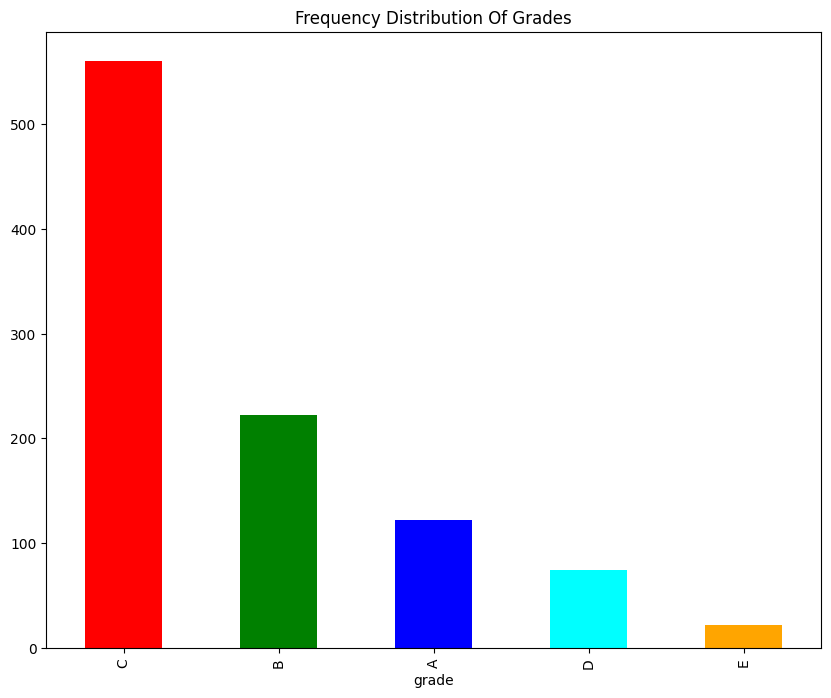

In [30]:
def calcgrade(percentage,result):
  if result=='Fail':
    return'E'
  if(percentage>=85):
    return'A'
  if(percentage>=75):
    return'B'
  if(percentage>=50):
    return'C'
  if(percentage>=33):
    return'D'
  else:
    return 'E'

sp['grade']=sp.apply(lambda x: calcgrade(x['percentage'],x['result']),axis=1)
sp['grade'].value_counts().plot.bar(title='Frequency Distribution Of Grades',color=['red','green','blue','cyan','orange'],figsize=(10,8))

In [31]:
sp['grade'].value_counts()

,count
grade,
C,560
B,222
A,122
D,74
E,22


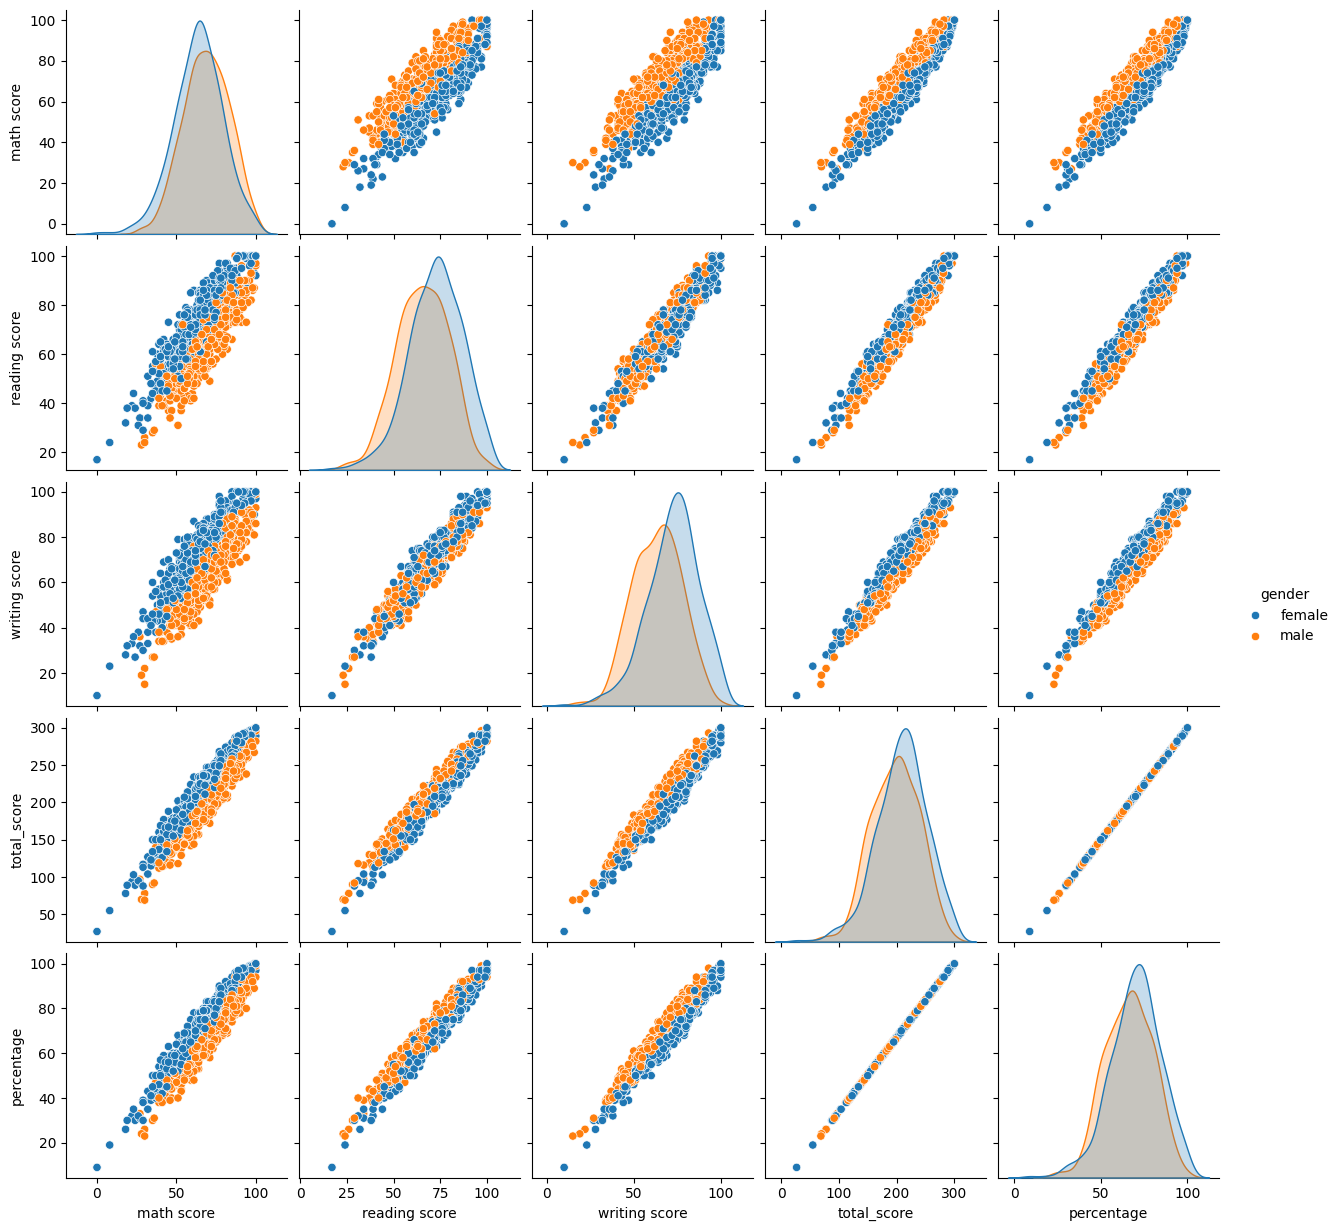

In [32]:
sns.pairplot(sp,hue='gender')
plt.show()

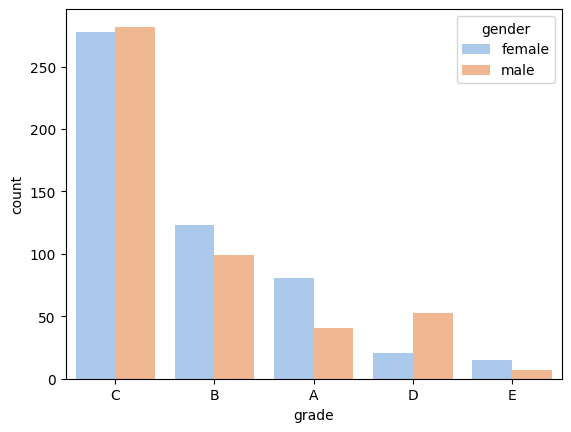

In [33]:
sns.countplot(x=sp['grade'],data=sp,hue=sp['gender'],palette='pastel')
plt.show()

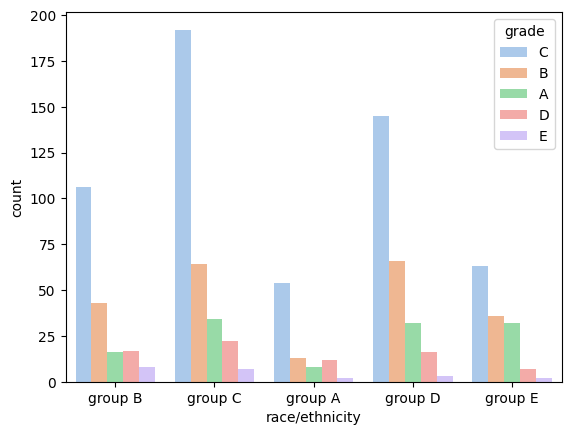

In [34]:
sns.countplot(x=sp['race/ethnicity'],data=sp,hue=sp['grade'],palette='pastel')
plt.show()

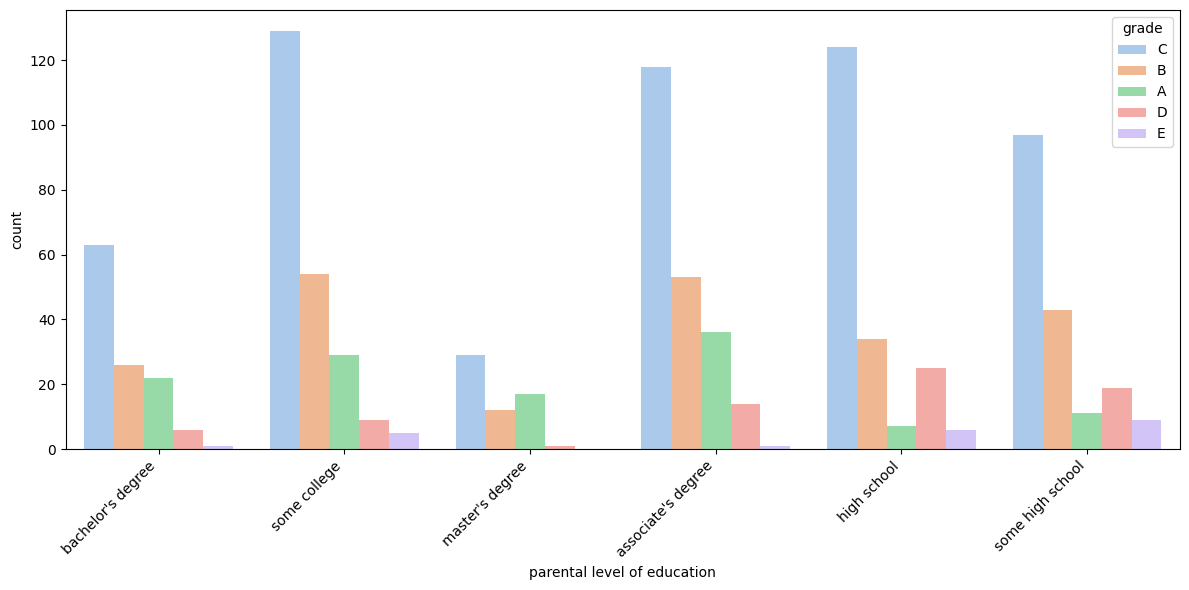

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x=sp['parental level of education'],data=sp,hue=sp['grade'],palette='pastel')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

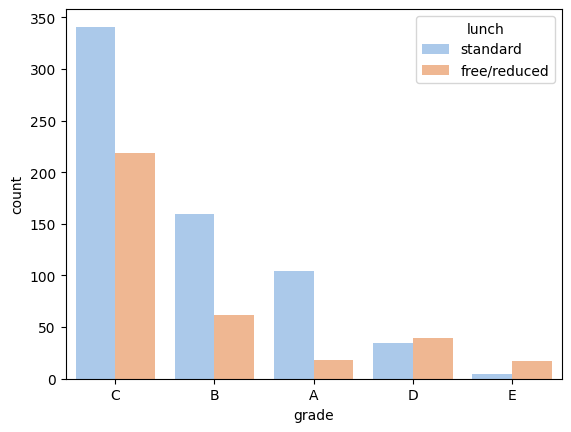

In [37]:
sns.countplot(x=sp['grade'],data=sp,hue=sp['lunch'],palette='pastel')
plt.show()

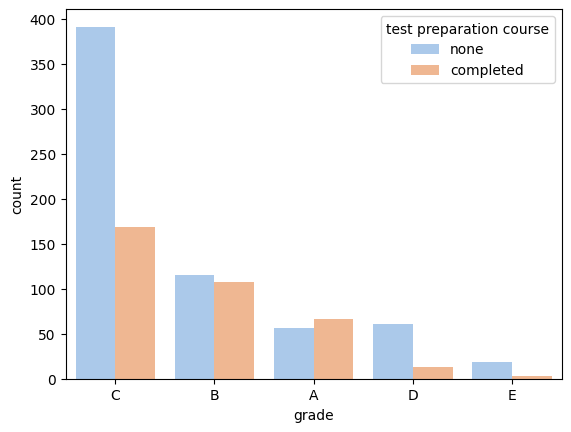

In [38]:
sns.countplot(x=sp['grade'],data=sp,hue=sp['test preparation course'],palette='pastel')
plt.show()